

1.   Criação de funções que auxiliam no tratamento dos dados
2.   Treinamento com todos os dados concatenados
3.   Avaliação do modelo com arquivos individuais de cada tipo de ataque.



In [ ]:
import pandas as pd

# Função para processar os dados
def process_can_data(data):
    processed_data = []
    for entry in data:
        parts = entry.split()
        timestamp = parts[0].strip("()")
        can_interface = parts[1]
        id_data = parts[2].split("#")
        can_id = id_data[0]
        data_bytes = list(id_data[1]) if len(id_data) > 1 else []
        data_bytes = [data_bytes[i:i+2] for i in range(0, len(data_bytes), 2)]
        data_bytes = [int(''.join(byte), 16) for byte in data_bytes]
        flag = parts[3]

        # Certificar que todos os slots data_bytes estão preenchidos com 0s se não estiverem presentes
        while len(data_bytes) < 8:
            data_bytes.append(0)

        processed_data.append([timestamp, can_interface, can_id] + data_bytes + [flag])

    # Criar DataFrame
    columns = ['timestamp', 'can-interface', 'id', 'data0', 'data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'flag']
    df = pd.DataFrame(processed_data, columns=columns)

    # Converter a coluna 'id' de hexadecimal para inteiro
    df['id'] = df['id'].apply(lambda x: int(x, 16))

    # Converter 'timestamp' para float
    df['timestamp'] = df['timestamp'].astype(float)

    # Calcular a diferença entre timestamps consecutivos
    df['timestamp_diff'] = df['timestamp'].diff().fillna(0)

    df.insert(1, 'timestamp_diff', df.pop('timestamp_diff'))


    return df
def prepare_data_for_model(df):
  df.drop(['timestamp', 'can-interface'], axis=1, inplace=True)
  df['flag'] = df['flag'].map({'T': 1, 'R': 0})

  return df
# Função para ler os dados de um arquivo txt e criar o DataFrame
def create_dataframe_from_txt(file_path):
    df = pd.read_csv(file_path, header=None)
    data = df[0].tolist()
    data = [line.strip() for line in data if line.strip()]  # Remover linhas em branco e espaços
    df_processed = process_can_data(data)
    df_prepared = prepare_data_for_model(df_processed)

    return df_prepared





In [ ]:
# Caminho do arquivo txt
file_path_impersonation = '/content/nome_arquivo'
file_path_dos = '/content//content/nome_arquivo'
file_path_fuzzing = '/content/nome_arquivo'
file_path_falsifying = '/content/nome_arquivo'
file_path_normal = '/content/nome_arquivo'

# Criar o DataFrame a partir do arquivo txt
df_normal = create_dataframe_from_txt(file_path_normal)
df_impersonation = create_dataframe_from_txt(file_path_impersonation)
df_dos = create_dataframe_from_txt(file_path_dos)
df_fuzzing = create_dataframe_from_txt(file_path_fuzzing)
df_falsifying = create_dataframe_from_txt(file_path_falsifying)
#df_full = pd.concat([df_normal, df_impersonation])
df_impersonation

In [ ]:
df_dos

,timestamp_diff,id,data0,data1,data2,data3,data4,data5,data6,data7,flag
0,0.000000,0,15,0,0,0,0,0,0,0,1
1,0.003580,14,243,239,0,0,0,0,0,0,0
2,0.000105,92,243,239,243,239,0,0,0,0,0
3,0.000113,65,1,0,0,0,0,0,0,0,0
4,0.000089,22,37,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
699994,0.000122,85,0,0,0,0,0,0,0,0,0
699995,0.000131,93,0,0,0,0,0,0,0,0,0
699996,0.001240,14,136,1,0,0,0,0,0,0,0
699997,0.000117,7,0,0,0,0,0,0,0,0,0


In [ ]:
df_falsifying

,timestamp_diff,id,data0,data1,data2,data3,data4,data5,data6,data7,flag
0,0.000000,14,59,23,234,0,0,0,0,0,1
1,0.009023,14,214,77,227,176,0,0,0,0,1
2,0.003541,13,231,249,0,0,0,0,0,0,0
3,0.000068,7,1,0,0,0,0,0,0,0,0
4,0.000164,91,231,249,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
699995,0.001935,14,54,0,0,0,0,0,0,0,0
699996,0.000105,7,0,0,0,0,0,0,0,0,0
699997,0.000173,92,54,0,54,0,0,0,0,0,0
699998,0.000126,65,0,0,0,0,0,0,0,0,0


In [ ]:
df_fuzzing

,timestamp_diff,id,data0,data1,data2,data3,data4,data5,data6,data7,flag
0,0.000000,153,16,112,0,0,0,0,0,0,1
1,0.004505,73,19,0,0,0,0,0,0,0,1
2,0.004601,85,190,1,130,153,188,0,0,0,1
3,0.004758,131,15,112,83,6,58,175,15,18,1
4,0.004692,4,48,35,84,217,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
699995,0.000123,23,1,0,0,0,0,0,0,0,0
699996,0.000111,86,1,0,0,0,0,0,0,0,0
699997,0.003076,69,108,0,0,0,0,0,0,0,1
699998,0.004545,156,106,30,229,146,179,0,0,0,1


In [ ]:
#criar uma lista com os dfs
dfs = [df_normal, df_impersonation, df_dos, df_fuzzing, df_falsifying]

#dropar coluna do timestamp_Diff de cada df na lista
for df in dfs:
  df.drop('timestamp_diff', axis=1, inplace=True)


In [ ]:
df_normal

,id,data0,data1,data2,data3,data4,data5,data6,data7,flag
0,14,200,67,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0
2,92,200,67,200,67,0,0,0,0,0
3,65,0,0,0,0,0,0,0,0,0
4,22,10,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
249995,8,1,0,0,0,0,0,0,0,0
249996,85,1,0,0,0,0,0,0,0,0
249997,93,1,0,0,0,0,0,0,0,0
249998,14,41,168,0,0,0,0,0,0,0


In [ ]:
#concatenar todos os dfs
df_full = pd.concat(dfs)
df_full

,id,data0,data1,data2,data3,data4,data5,data6,data7,flag
0,14,200,67,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0
2,92,200,67,200,67,0,0,0,0,0
3,65,0,0,0,0,0,0,0,0,0
4,22,10,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
699995,14,54,0,0,0,0,0,0,0,0
699996,7,0,0,0,0,0,0,0,0,0
699997,92,54,0,54,0,0,0,0,0,0
699998,65,0,0,0,0,0,0,0,0,0


In [ ]:
#mostrar a quantidade de flags 1 e flgas 0
df_full['flag'].value_counts()

,count
flag,
0,2129583
1,920416


#random forest classifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib




# Step 4: Train Random Forest Classifier
X = df_full[[ 'id', 'data0','data1','data2','data3','data4','data5','data6','data7']]
y = df_full['flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test.head(1).values.tolist()


[[23, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)



# Step 5: Evaluate the Model
y_pred = clf.predict(X_test)


print("Accuracy-rfc:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy-rfc: 0.9936131147540984
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    426189
           1       0.99      0.98      0.99    183811

    accuracy                           0.99    610000
   macro avg       0.99      0.99      0.99    610000
weighted avg       0.99      0.99      0.99    610000



Confusion Matrix:
 [[425093   1096]
 [  2800 181011]]
Precision: 0.9936145820162309
Recall: 0.9936131147540984
F1-Score: 0.9936046149069833
AUC: 0.997134139223418


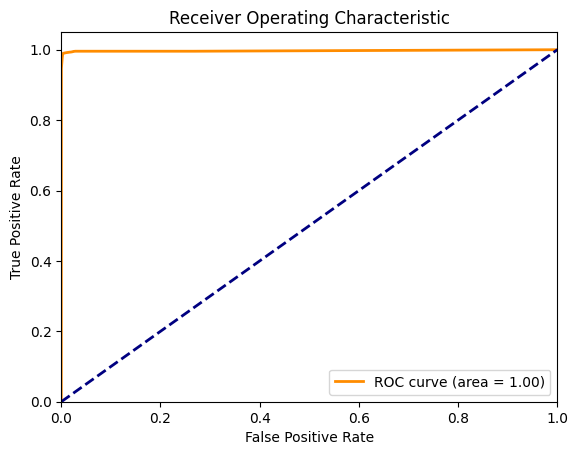

Log Loss: 0.060952093984041514
Mean Absolute Error: 0.0063868852459016395


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, log_loss, mean_absolute_error
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score (already included in the classification report, but you can print them individually)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# ROC Curve and AUC
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Assuming binary classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Log Loss
logloss = log_loss(y_test, y_pred_prob)
print("Log Loss:", logloss)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


In [ ]:
3896/920416

0.004232868615930188

In [ ]:
import joblib

# Salvar o modelo
joblib.dump(clf, 'random_forest_classifier.pkl')


['random_forest_classifier.pkl']

##Testando acurácia de cada tipo de ataque

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, log_loss, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
clf_loaded = joblib.load('random_forest_classifier.pkl')

In [ ]:
file_path_test_dos = '/content/0-dos-candump-2024-07-31_175544.log'
file_path_test_falsifying = '/content/1-falsifying-candump-2024-07-31_175714.log'
file_path_test_fuzzing = '/content/2-fuzzing-candump-2024-07-31_175844.log'
file_path_test_impersonation = '/content/3-impersonation-candump-2024-07-31_180014.log'

In [ ]:
#lista com os caminhos dos arquivos
file_paths = [file_path_test_dos, file_path_test_falsifying, file_path_test_fuzzing, file_path_test_impersonation]

In [ ]:
def process_df(file_path):
  df_test = create_dataframe_from_txt(file_path)
  df_test.drop('timestamp_diff', axis=1, inplace=True)
  test = df_test[[ 'id', 'data0','data1','data2','data3','data4','data5','data6','data7']]
  result = df_test['flag']
  return test, result

def plot_confusion_matrix(result,y_pred, atck_name):

  conf_matrix = confusion_matrix(result, y_pred)



  # Calcula a matriz de confusão
  conf_matrix = confusion_matrix(result, y_pred)

  # Configura o tamanho da figura
  plt.figure(figsize=(5, 5))

  # Cria um mapa de calor da matriz de confusão
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

  # Configura os rótulos dos eixos
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')

  # Adiciona um título ao gráfico
  plt.title(f'Confusion Matrix for {atck_name} Attack')

  # Exibe o gráfico
  plt.show()


def plot_AUC_and_ROC(result, y_pred,test):
  # ROC Curve and AUC
  y_pred_prob = clf_loaded.predict_proba(test)[:, 1]  # Assuming binary classification
  fpr, tpr, thresholds = roc_curve(result, y_pred_prob)
  roc_auc = roc_auc_score(result, y_pred_prob)
  print(f"AUC {atck_name} Attack:", roc_auc)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

  # Log Loss
  logloss = log_loss(result, y_pred_prob)
  print("Log Loss:", logloss)

  # Mean Absolute Error
  mae = mean_absolute_error(result, y_pred)
  print("Mean Absolute Error:", mae)


def plot_results(result, y_pred,test,atck_name):
  print(f"Accuracy - {atck_name} Attack:", accuracy_score(result, y_pred))
  print(f"Classification Report - {atck_name} Attack:\n", classification_report(result, y_pred))
  # Confusion Matrix

  plot_confusion_matrix(result, y_pred, atck_name)

  # Precision, Recall, F1-Score (already included in the classification report, but you can print them individually)

  precision = precision_score(result, y_pred, average='weighted')
  recall = recall_score(result, y_pred, average='weighted')
  f1 = f1_score(result, y_pred, average='weighted')
  print(f"Precision - {atck_name} Attack:", precision)
  print(f"Recall - {atck_name} Attack:", recall)
  print(f"F1-Score - {atck_name} Attack:", f1)
  # ROC Curve and AUC

  plot_AUC_and_ROC(result, y_pred,test)

  print('\n\n\n\n------------------------------------\n\n\n\n')



Accuracy - Dos Attack: 0.9893054762909109
Classification Report - Dos Attack:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     34134
           1       0.93      1.00      0.97      6167

    accuracy                           0.99     40301
   macro avg       0.97      0.99      0.98     40301
weighted avg       0.99      0.99      0.99     40301



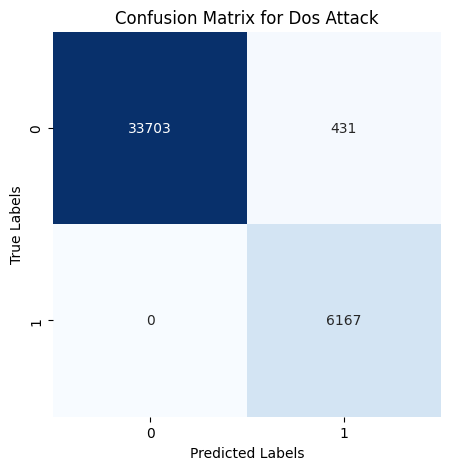

Precision - Dos Attack: 0.9900040727926716
Recall - Dos Attack: 0.9893054762909109
F1-Score - Dos Attack: 0.989452048663546
AUC Dos Attack: 0.9999853399723592


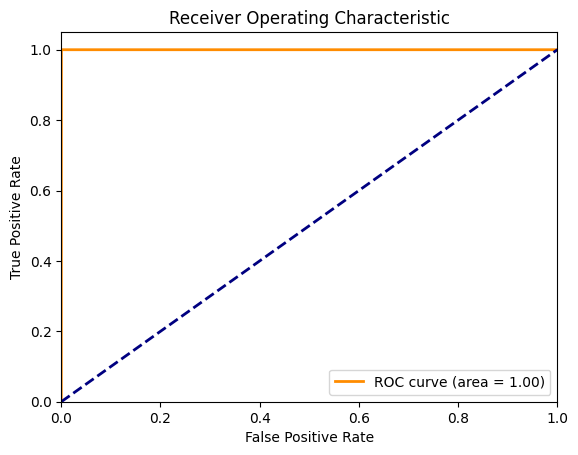

Log Loss: 0.023117763767620737
Mean Absolute Error: 0.010694523709089104




------------------------------------




Accuracy - Falsifying Attack: 0.9835385402915107
Classification Report - Falsifying Attack:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     34135
           1       0.86      0.95      0.90      2982

    accuracy                           0.98     37117
   macro avg       0.93      0.97      0.95     37117
weighted avg       0.98      0.98      0.98     37117



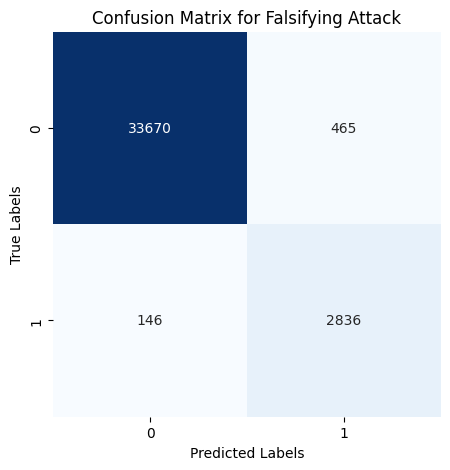

Precision - Falsifying Attack: 0.9847121024297665
Recall - Falsifying Attack: 0.9835385402915107
F1-Score - Falsifying Attack: 0.9839177906346055
AUC Falsifying Attack: 0.9902306176299042


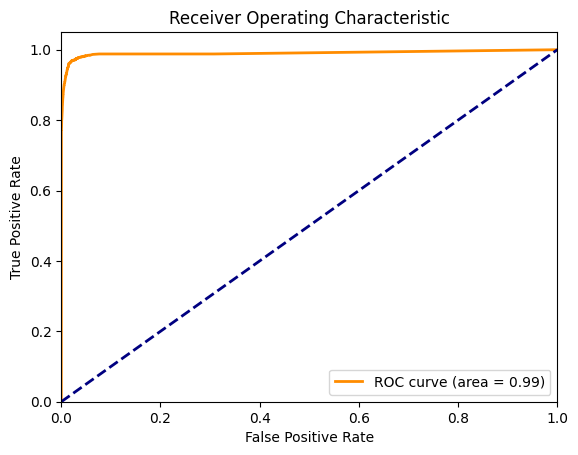

Log Loss: 0.07037053858416395
Mean Absolute Error: 0.016461459708489373




------------------------------------




Accuracy - Fuzzing Attack: 0.9882751966316774
Classification Report - Fuzzing Attack:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     34172
           1       0.07      1.00      0.13        29

    accuracy                           0.99     34201
   macro avg       0.53      0.99      0.56     34201
weighted avg       1.00      0.99      0.99     34201



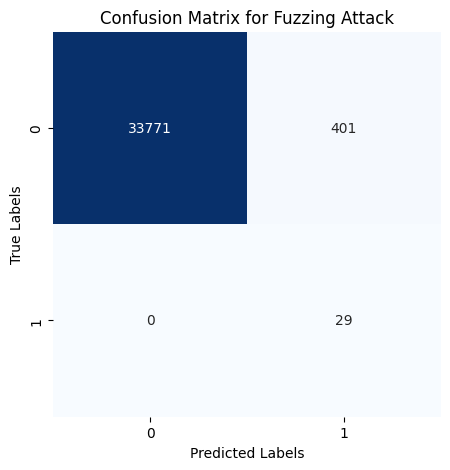

Precision - Fuzzing Attack: 0.9992092574472525
Recall - Fuzzing Attack: 0.9882751966316774
F1-Score - Fuzzing Attack: 0.9933622156017577
AUC Fuzzing Attack: 1.0


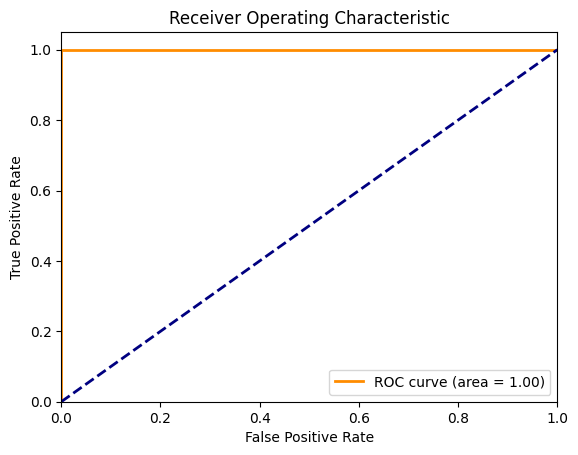

Log Loss: 0.025505484607525716
Mean Absolute Error: 0.011724803368322564




------------------------------------




Accuracy - Impersonation Attack: 0.9872675538182968
Classification Report - Impersonation Attack:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     34247
           1       0.55      1.00      0.71       546

    accuracy                           0.99     34793
   macro avg       0.78      0.99      0.85     34793
weighted avg       0.99      0.99      0.99     34793



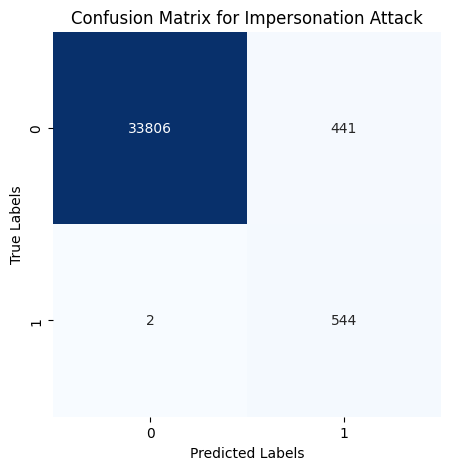

Precision - Impersonation Attack: 0.992915851979917
Recall - Impersonation Attack: 0.9872675538182968
F1-Score - Impersonation Attack: 0.9890519426632135
AUC Impersonation Attack: 0.9995957775398311


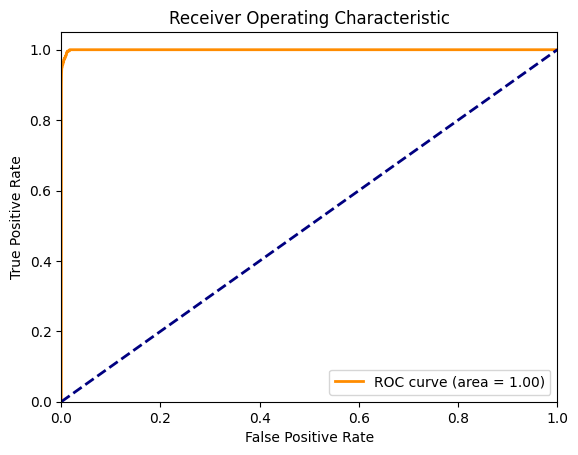

Log Loss: 0.028132314904938976
Mean Absolute Error: 0.012732446181703216




------------------------------------






In [ ]:
# nome do ataque + predição + resultados
for file_path in file_paths:
  atck_name = file_path.split('-')[1]
  atck_name = atck_name[0].upper() + atck_name[1:]
  test, result = process_df(file_path)
  y_pred = clf_loaded.predict(test)
  plot_results(result, y_pred,test, atck_name)

In [ ]:
y_pred = clf_loaded.predict([[92,254,255,254,255,0,0,0,0],[0,0,0,0,0,0,0,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred

array([0, 1])